In [0]:
import re
import string

!pip install -U nltk

import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import sent_tokenize # Sentence Tokenizer
from nltk.tokenize import word_tokenize # Word Tokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.probability import FreqDist

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 1) (optional) Scrape 100 Job Listings that contain the title "Data Scientist" from indeed.com

At a minimum your final dataframe of job listings should contain
- Job Title
- Job Description

In [0]:
##### Your Code Here #####
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time

In [0]:
######   SCRAPING JOB LISTINGS ON INDEED   ######

 
  
#Get initial URL for pages with job listings on it
def make_urls(max_jobs = 200, 
              job_title = '"Data Scientist"', 
              location = 'United States', 
              num_per_page = 10):
  
  num_pages = max_jobs //num_per_page
  job_title = job_title.replace(' ', '+')
  location = location.replace(' ', '+')

  root = 'http://www.indeed.com/jobs?q='
  list_urls = []
  page_num = 0

  for page in range(num_pages):
    if page_num == 0:
      seed_url = root + job_title + '&l=' + location
    else:
      job_num = page_num*10
      job_num = str(job_num)
      seed_url = root + job_title + '&l=' + location + '&start' + job_num
    page_num = page_num + 1
    list_urls.append(seed_url)

  return list_urls  


#Git links to every job on job listings page
def get_job_urls(list_urls):
  list_urls = make_urls(max_jobs = 200, 
                        job_title = '"Data Scientist"', 
                        location = 'United States', 
                        num_per_page = 10)
  job_urls = []
  for url in list_urls:
    content = requests.get(url, timeout=5)
    if content.status_code == 200:
      soup = BeautifulSoup(content.text, 'html.parser')

      for a in soup.find_all("h2", { "class" : "jobtitle" }, 'a'):
        job_href = a.find('a')['href']
        if job_href[1] == 'c':
          job_url = 'https://www.indeed.com' + job_href
          job_urls.append(job_url)
        else:
          job_url = 'https://www.indeed.com/viewjob?jk=' + job_href[11:]
          job_urls.append(job_url)
  return job_urls


#get job details:
def get_job_details(job_lists_url):
  
  job_lists_url = get_job_urls(list_urls)
  jobs_details_dict = {'title':[],
                       'description':[], 
                       'company_name':[], 
                       'company_location':[]}

  for url in job_lists_url:
    job_details = requests.get(url, timeout=5)

    if job_details.status_code == 200:

      job_details_soup = BeautifulSoup(job_details.text, 'html.parser')

      title = job_details_soup.find('h3', {"class": "jobsearch-JobInfoHeader-title"}).get_text()
      jobs_details_dict['title'].append(title)

      description = job_details_soup.find('div', {'class': 'jobsearch-JobComponent-description'}).get_text()
      jobs_details_dict['description'].append(description)

      try:
        company_name = job_details_soup.find('div', {'class': 'jobsearch-InlineCompanyRating'}).findAll("div")[0].get_text()
        jobs_details_dict['company_name'].append(company_name)
      except:
        jobs_details_dict['company_name'].append('Unknown')
        pass
      try:
        company_location = job_details_soup.find('div', {'class': 'jobsearch-InlineCompanyRating'}).findAll("div")[-1].get_text()
        jobs_details_dict['company_location'].append(company_location)
      except:
        jobs_details_dict['company_location'].append('Unknown')
        pass  

  return jobs_details_dict

scientists_jobs = get_job_details(job_lists_url)
scientists_jobs

In [89]:
from google.colab import drive
drive.mount('drive')
df_scientist.to_csv('df_scientist.csv', index=False)
!cp df_scientist.csv drive/My\ Drive/

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at drive


In [0]:
df_analyst.to_csv('df_analyst.csv', index=False)
!cp df_analyst.csv drive/My\ Drive/

In [50]:
df_scientist = pd.DataFrame(scientists_jobs)
df_scientist

,company_location,company_name,description,title
0,"Palo Alto, CA 94306",Instart,The Data Scientist will work closely with Prod...,Data Scientist
1,"Lake Forest, IL","TSI - Transworld System, Inc","TSI, is a leading supplier of specialized busi...",Data Scientist
2,"Dallas, TX",AustinCSI,Looking for a Data Scientist with 5 years of e...,Data Scientist
3,"Dallas, TX",AustinCSI,Data Scientist with 2 years or more experience...,Data Scientist (2 years)
4,"San Jose, CA",SSIT Inc,"$120,000 - $130,000 a yearContractStrong backg...",Data Scientist
5,"Draper, UT",Zenabi,Zenabi finds signals which provide deep busine...,Principal Data Scientist
6,"Washington, DC",IT Veterans,IT Veterans (ITV) is seeking a Data Scientist ...,Data Scientist
7,"San Antonio, TX",Ke'aki Technologies,"Ke'aki Technologies LLC, is a Native Hawaiian ...",Data Scientist
8,Unknown,Unknown,Are you passionate about solving challenging p...,Data Scientist
9,"Los Angeles, CA 90025",Conversion Logic,Our team is changing the way marketing decisio...,Data Scientist


In [23]:
analyst_jobs
df_analyst = pd.DataFrame(analyst_jobs)
df_analyst

,company_location,company_name,description,title
0,"San Francisco, CA 94103",Glu Mobile,"Senior Data AnalystAs a Senior Data Analyst, y...",Sr. Data Analyst
1,"Mountain View, CA",Google,Note: By applying to this position your applic...,"Data Analyst, Users and Products"
2,"Chicago, IL 60610",Drivin,"Love cars, technology and data? So do we. KAR ...",Data Analyst
3,"McLean, VA",Gannett,"Part-time, InternshipABOUT GANNETT\n\nGannett ...",Data Analyst Intern
4,"Kansas City, MO",Schenck Process,Job Summary: This position works with manageme...,Business Intelligence Analyst
5,"Foster City, CA",BayInfotech,ContractJob SummaryThis resource to support AP...,Data Analyst
6,"San Francisco, CA 94107",Granular,InternshipMore than 7 billion people depend on...,Data Analyst Intern
7,"San Francisco, CA 94103",Wish,Data driven decision-making is an integral par...,Data Analyst
8,"Edison, NJ","Baanyan Software Services, Inc","$60,000 - $65,000 a yearContractJob SummarySki...",Data Analyst
9,"New York, NY 10018",Fora Financial LLC,"Fora Financial, located in NYC, is a leading f...",Junior Data Analyst


## 2) Use NLTK to tokenize / clean the listings 

In [52]:
!pip install -U nltk
nltk.download('punkt')
nltk.download('stopwords')

Requirement already up-to-date: nltk in /usr/local/lib/python3.6/dist-packages (3.4)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [0]:
from nltk.tokenize import word_tokenize
import string

table = str.maketrans('','', string.punctuation)
stop_words = set(stopwords.words('english'))

cleaned_job_description_list = []


In [0]:
def clean_preprocess_words(words_list):
  cleaned_list = []
  for word in words_list:
    #Tokenize by word
    tokens = word_tokenize(word)
    #print('Tokens:', tokens)

    #Make all words lowercase
    lower_tokens = [w.lower() for w in tokens]
    #print(lower_tokens)

    #strip punctuation from within words
    no_punctuation = [w.translate(table) for w in lower_tokens]
    #print(no_punctuation)

    #remove words that aren't alphabetic
    alphabetic = [word for word in no_punctuation if word.isalpha()]
    #print(alphabetic)

    #remove stopwords
    words = [w for w in alphabetic if not w in stop_words]
    #print(words)

    #append to cleaned list
    cleaned_list.append(words)
    
  return cleaned_list

In [0]:
analyst_description = df_analyst.description
scientist_description = df_scientist.description

cleaned_analyst_description = clean_preprocess_words(analyst_description)
cleaned_scientist_description = clean_preprocess_words(scientist_description)

In [0]:
def stemming(cleaned_listings):
  from nltk.stem.porter import PorterStemmer
  stemmer = PorterStemmer()

  stemmed_listings = []

  for listing in cleaned_listings:
    stemmed = [stemmer.stem(word) for word in listing]
    stemmed_listings.append(stemmed)
  return stemmed_listings  


In [0]:
analyst_stemmed_listings = stemming(cleaned_analyst_description)
scientist_stemmed_listings = stemming(cleaned_scientist_description)

In [0]:
def lemmatize(word_listing):
  nltk.download('wordnet')
  from nltk.stem.wordnet import WordNetLemmatizer
  lemmatizer = WordNetLemmatizer()

  lemmatized_listings = []

  for listing in word_listing:
    lemmas = [lemmatizer.lemmatize(word) for word in listing]
    lemmatized_listings.append(lemmas)

  return lemmatized_listings

In [0]:
analyst_lemmatized_listings = lemmatize(analyst_stemmed_listings)
scientist_lemmatized_listings = lemmatize(scientist_stemmed_listings)

# 3) Use Scikit-Learn's CountVectorizer to get word counts for each listing.

In [0]:
##### Your Code Here #####
def sklearn_vectorize(lemmatized_listings):
  from sklearn.feature_extraction.text import CountVectorizer
  vectorizer = CountVectorizer(lowercase=True, stop_words='english')

  vectorizer = CountVectorizer()

  #get the words ready to the shape vectorizer expects
  lemmatized_job_listings = []
  
  for listing in lemmatized_listings:
    new_listing = " ".join(listing)
    lemmatized_job_listings.append(new_listing)
  lemmatized_job_listings


  # List of document strings as text
  text = lemmatized_job_listings

  #instantiate vectorizer object
  vectorizer = CountVectorizer()

  #create a vocabulary and get word counts per document
  bag_of_words = vectorizer.fit_transform(text)

  #print word counts
  print(bag_of_words.toarray())

  #get feature names to use as dataframe column headers
  feature_names = vectorizer.get_feature_names()
  print(feature_names)
  return bag_of_words, feature_names, lemmatized_job_listings

In [84]:
analyst_bow, analyst_features, analyst_text_job_listings = sklearn_vectorize(analyst_lemmatized_listings)
scientist_bow, scientist_features, scientist_text_job_listings = sklearn_vectorize(scientist_lemmatized_listings)

[[2 0 0 ... 0 0 0]
 [0 2 0 ... 0 0 0]
 [0 1 1 ... 0 0 0]
 ...
 [0 5 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
['ab', 'abil', 'abl', 'abreast', 'academ', 'accept', 'access', 'accessknowledg', 'accommod', 'accomplish', 'accord', 'account', 'accountseduc', 'accountsonsit', 'accredit', 'accur', 'accuraci', 'achiev', 'aco', 'acospecif', 'acquisit', 'acrevalu', 'across', 'act', 'action', 'actionequ', 'activ', 'actual', 'acumen', 'ad', 'adapt', 'addict', 'addit', 'address', 'adept', 'adher', 'adhoc', 'adjust', 'administ', 'administr', 'admiss', 'admit', 'adoptionstakehold', 'advanc', 'advertis', 'advertisingindustri', 'advic', 'advis', 'advisor', 'advoc', 'aecom', 'aerorspac', 'affect', 'affili', 'affirm', 'afford', 'aftermarket', 'age', 'agenc', 'agenciesdata', 'aggress', 'agil', 'agilescrum', 'agronomi', 'agronomist', 'agstudio', 'aid', 'aim', 'airflow', 'alienag', 'align', 'alikeresponsibilitiesdesign', 'allow', 'along', 'alongsid', 'alphabet', 'also', 'alton', 'alway', 'america'

# 4) Visualize the most common word counts

In [0]:
##### Your Code Here #####
def vis_common_words(lemmatized_listings):
  from nltk.probability import FreqDist

  all_the_words = []
  for listing in lemmatized_listings:
    for word in listing:
      all_the_words.append(word)

  fdist = FreqDist(all_the_words)
  print(fdist)

  fdist.most_common(50)

  import matplotlib.pyplot as plt
  fdist.plot(30, cumulative=False)
  plt.show()

<FreqDist with 1736 samples and 39202 outcomes>


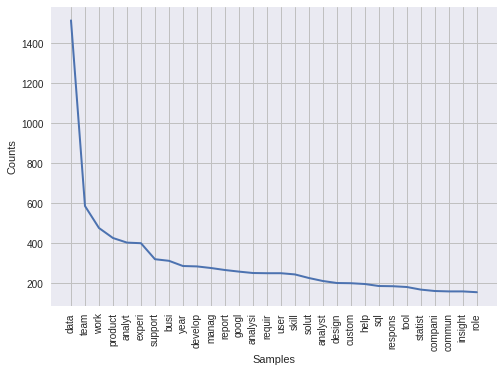

In [69]:
vis_common_words(analyst_lemmatized_listings)

<FreqDist with 1534 samples and 38745 outcomes>


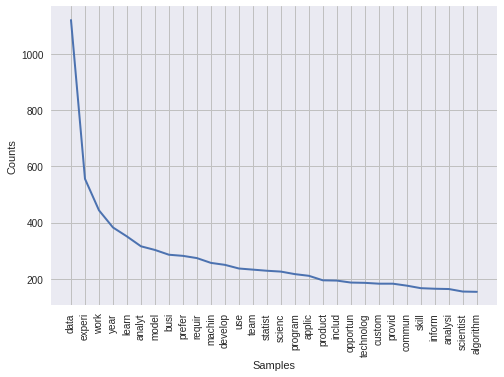

In [70]:
vis_common_words(scientist_lemmatized_listings)

 # 5) Use Scikit-Learn's tfidfVectorizer to get a TF-IDF feature matrix

In [0]:
def sklearn_vectorize(lemmatized_job_listings):
  ##### Your Code Here #####
  from sklearn.feature_extraction.text import TfidfVectorizer

  # List of document strings as text
  text = lemmatized_job_listings
  # Instantiate vectorizer object
  tfidf = TfidfVectorizer(max_features = 20)
  # Create a vocabulary and get word counts per document
  feature_matrix = tfidf.fit_transform(text)
  # Print word counts
  print(feature_matrix.toarray())

  # Get feature names to use as dataframe column headers
  feature_names = tfidf.get_feature_names()

  # View Feature Matrix as DataFrame
  df = pd.DataFrame(feature_matrix.toarray(), columns=feature_names)
  df.head()

In [87]:
sklearn_vectorize(analyst_text_job_listings)  

[[0.08438478 0.31524397 0.39656923 ... 0.         0.15960373 0.37164201]
 [0.09200662 0.         0.08647767 ... 0.58304778 0.05800651 0.13506989]
 [0.04483513 0.22332627 0.37926766 ... 0.         0.16960057 0.24682498]
 ...
 [0.14923053 0.         0.         ... 0.         0.42337758 0.        ]
 [0.41897849 0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [88]:
sklearn_vectorize(scientist_text_job_listings)  

[[0.05768847 0.16316592 0.14658356 ... 0.06986722 0.15221917 0.05895991]
 [0.07409353 0.         0.28240202 ... 0.08973559 0.06516875 0.30290613]
 [0.         0.         0.         ... 0.         0.34648884 0.40262241]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.40964119 0.09655234 0.         ... 0.08268692 0.18014936 0.13955653]
 [0.23795729 0.16825945 0.         ... 0.         0.13952976 0.12160091]]


## Stretch Goals

 - Scrape Job Listings for the job title "Data Analyst". How do these differ from Data Scientist Job Listings
 - Try and identify requirements for experience specific technologies that are asked for in the job listings. How are those distributed among the job listings?
 - Use a clustering algorithm to cluster documents by their most important terms. Do the clusters reveal any common themes?
  - **Hint:** K-means might not be the best algorithm for this. Do a little bit of research to see what might be good for this. Also, remember that algorithms that depend on Euclidean distance break down with high dimensional data.